In [18]:
#pip install numpy pandas matplotlib tensorflow scikit-learn yfinance --> copy and paste into your terminal and make sure you have jupyter installed.
# used https://github.com/RipanPurkait/Predicting-Stock-Prices-of-FAANG-Companies-with-GRU-A-Deep-Learning-Approach as a massive inspo for this project tysm

In [19]:
pip install numpy; pandas; matplotlib; tensorflow; scikit-learn; yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import yfinance as yf

In [21]:
#install the data required for the analysis of the stock. for ex we will use aapl (apple stock) from the past 10 years.
data = yf.download("AAPL", start = '2010-01-01', end='2024-10-25')

[*********************100%***********************]  1 of 1 completed


In [22]:
#simply prints out basic info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3728 entries, 2010-01-04 00:00:00+00:00 to 2024-10-24 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3728 non-null   float64
 1   (Close, AAPL)      3728 non-null   float64
 2   (High, AAPL)       3728 non-null   float64
 3   (Low, AAPL)        3728 non-null   float64
 4   (Open, AAPL)       3728 non-null   float64
 5   (Volume, AAPL)     3728 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 203.9 KB


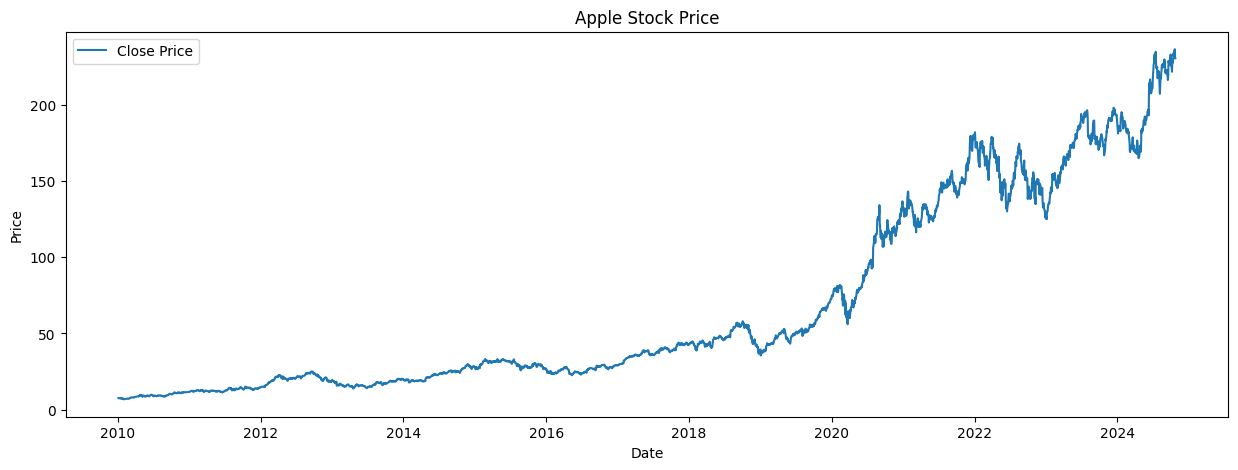

In [23]:
#now we will display the data that was recieved from the dataset
plt.figure(figsize=(15,5))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
#what this code does is that it 'compresses' the values from the apple stock into smaller values (from 0 to 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']])

In [25]:
def create_sequences (data, seq_length=60):  #function that generates sequences for training and testing model. takes in input data (the scaled data) and the sequence length(60 days of data)
    x = [] # the 60 days of data will be added here
    y = [] # the predicted day will be added here
    for i in range (seq_length, len(data)): #loops from index that corr with seqlength until the length of the total data
        x.append(data[i-seq_length:i, 0]) # i-seq_length:i extracts 60 consecutive pieces of info
        y.append(data[i, 0]) #extracts the next day's stock price
    return np.array(x), np.array(y) #converts to numpy for the output
x, y = create_sequences(scaled_data)
x.reshape((x.shape[0], x.shape[1], 1)) # look to bottom markdown for explanation

array([[[0.00341556],
        [0.00347311],
        [0.00294274],
        ...,
        [0.00604257],
        [0.00627431],
        [0.00681246]],

       [[0.00347311],
        [0.00294274],
        [0.00288207],
        ...,
        [0.00627431],
        [0.00681246],
        [0.00668026]],

       [[0.00294274],
        [0.00288207],
        [0.00309982],
        ...,
        [0.00681246],
        [0.00668026],
        [0.00683113]],

       ...,

       [[0.92056482],
        [0.92300361],
        [0.93728801],
        ...,
        [0.98114284],
        [0.99355462],
        [1.        ]],

       [[0.92300361],
        [0.93728801],
        [0.9210874 ],
        ...,
        [0.99355462],
        [1.        ],
        [0.99729992]],

       [[0.93728801],
        [0.9210874 ],
        [0.9276199 ],
        ...,
        [1.        ],
        [0.99729992],
        [0.97508939]]])

the way that GRUs take input is in a 3 dimensional array format. they take in samples, timesteps, and features. in our situation, the samples are the number of traning samples, timesteps are the number of timesteps (60 days) adn the features are the number of input features  (which is one, the closing price)

In [26]:
#TIME TO BUILD THE MODELLL!!!
model = Sequential() #defines the model as sequential and makes it a linear model (neural network)
model.add(GRU(units=50, return_sequences=True, input_shape=(x.shape[1], 1))) # 
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.fit(x, y, batch_size=32, epochs=20)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - loss: 0.0183
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 1.0279e-04
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 9.5700e-05
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 9.1254e-05
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 8.5536e-05
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 8.5706e-05
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 8.9120e-05
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 8.5699e-05
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 7.8492e-05
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 8.3039e-05
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 8.5366e-05
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 8.6688e-05
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 6.0718e-05
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - l

In [28]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [29]:
x_test, y_test = create_sequences(test_data)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


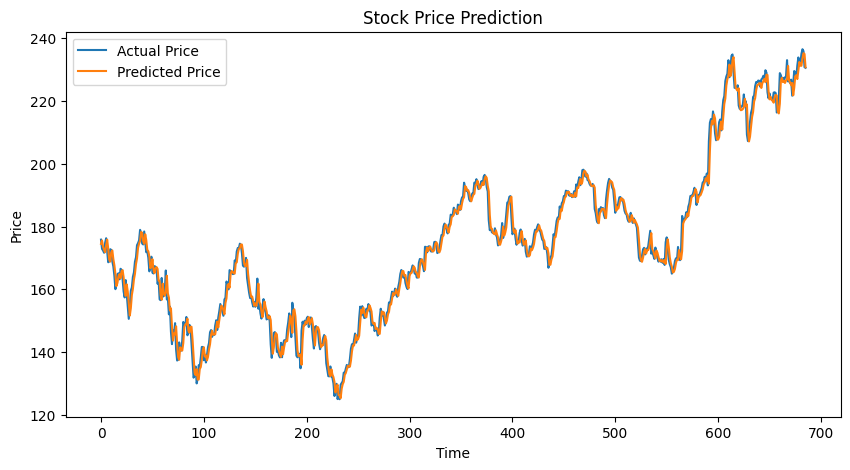

In [32]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


awesome, now we know tha tthe model is actually pretty accurate, but can it make us money? lets see what the predicted stock price is tomorrow

In [34]:

#first lets see the error on this model so far...
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


Mean Absolute Error: 2.276417501466267
Mean Squared Error: 8.842708860515515
R-squared: 0.9866863503211091


In [42]:
latest_data = scaled_data[-60:]  # Last 60 days
latest_data = latest_data.reshape(1, 60, 1)  # Reshape for the model
next_day_prediction = model.predict(latest_data)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
print(f"Predicted stock price for tomorrow: {next_day_prediction[0][0]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted stock price for tomorrow: 229.73696899414062
